In [1]:
%cd '/content/drive/MyDrive/Colab Notebooks/CNNmodel'

/content/drive/MyDrive/Colab Notebooks/CNNmodel


In [2]:
# 데이터셋 불러오기, 훈련셋과 테스트셋 분류
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# 데이터셋과 검증셋 분류
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

# 1. AlexNet 모델 
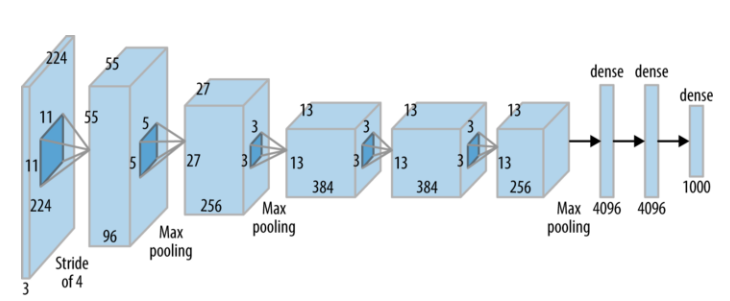

In [30]:
# 모델 설계
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, activation='relu'),
    keras.layers.MaxPool2D(strides=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size=(3, 3), filters=64, activation='relu'),
    keras.layers.MaxPool2D(strides=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size=(3, 3), filters=128, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('bset_cnn_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_22 (Bat  (None, 13, 13, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                      

In [31]:
# 모델 학습
history = model.fit(train_input, train_target, epochs=50,
                    validation_data=(val_input, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5061 - accuracy: 0.8231 - val_loss: 0.3469 - val_accuracy: 0.8726
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3422 - accuracy: 0.8791 - val_loss: 0.2903 - val_accuracy: 0.8942
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2907 - accuracy: 0.8966 - val_loss: 0.2777 - val_accuracy: 0.8990
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2639 - accuracy: 0.9058 - val_loss: 0.2733 - val_accuracy: 0.9010
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2352 - accuracy: 0.9153 - val_loss: 0.2529 - val_accuracy: 0.9060
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2174 - accuracy: 0.9220 - val_loss: 0.2769 - val_accuracy: 0.9058
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1972 - accuracy: 0.9295 - val_loss: 0.2679 - val_accuracy:

In [32]:
# 성능 측정
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.9007


[0.2804667353630066, 0.9006999731063843]

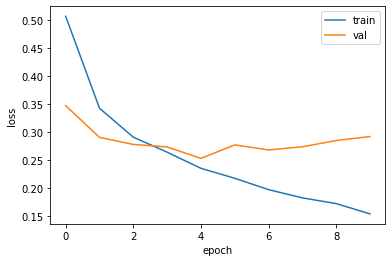

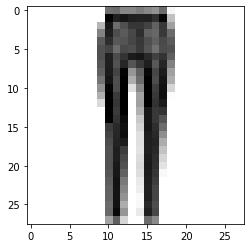

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

plt.imshow(train_input[0].reshape(28,28), cmap='gray_r')
plt.show()

# 2. ZFNet 모델 학습
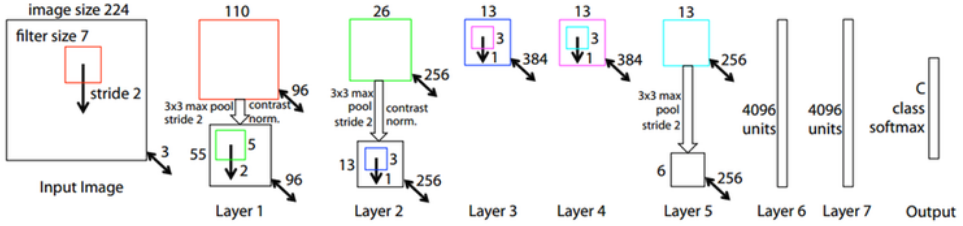

In [26]:
# 데이터셋 불러오기, 훈련셋과 테스트셋 분류
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [27]:
# 데이터셋과 검증셋 분류
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

In [50]:
# 모델 설계
model2 = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(5, 5), filters=32, activation='relu'),
    keras.layers.MaxPool2D(strides=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size=(3, 3), filters=64, activation='relu'),
    keras.layers.MaxPool2D(strides=(1, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size=(3, 3), filters=128, activation='relu'),
    keras.layers.MaxPool2D(strides=(1, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size=(3, 3), filters=64, activation='relu'), # Filter의 크기는 줄이면서, 개수를 늘리는 방향 hyper parameters를 조정
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('bset_cnn_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_44 (Bat  (None, 12, 12, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_104 (Conv2D)         (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                     

In [21]:
# 모델 학습
history = model2.fit(train_input, train_target, epochs=50,
                    validation_data=(val_input, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6000 - accuracy: 0.7851 - val_loss: 0.3706 - val_accuracy: 0.8646
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4052 - accuracy: 0.8571 - val_loss: 0.3324 - val_accuracy: 0.8802
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3579 - accuracy: 0.8733 - val_loss: 0.3477 - val_accuracy: 0.8705
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3324 - accuracy: 0.8849 - val_loss: 0.3292 - val_accuracy: 0.8821
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3022 - accuracy: 0.8928 - val_loss: 0.3275 - val_accuracy: 0.8828
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2885 - accuracy: 0.8985 - val_loss: 0.2845 - val_accuracy: 0.8974
Epoch 7/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2736 - accuracy: 0.9024 - val_loss: 0.3162 - val_accuracy:

In [22]:
# 성능 측정
model2.evaluate(test_input, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2899 - accuracy: 0.9015


[0.28985148668289185, 0.9014999866485596]

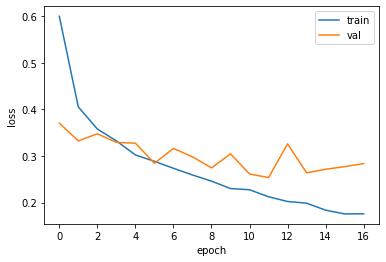

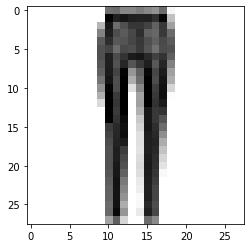

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

plt.imshow(train_input[0].reshape(28,28), cmap='gray_r')
plt.show()

# 3. VGGNet 모델
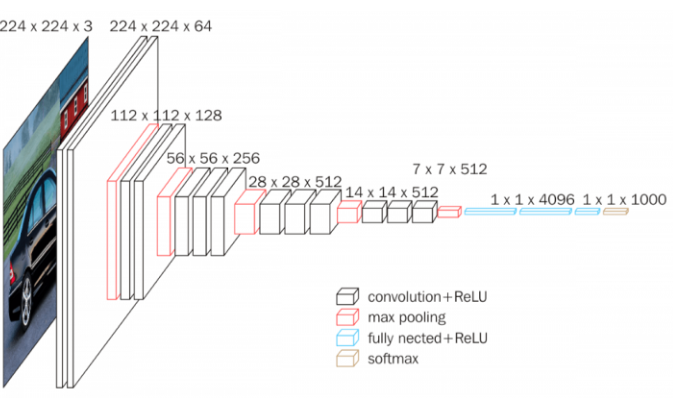

In [44]:
# 데이터셋 불러오기, 훈련셋과 테스트셋 분류
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [45]:
# 데이터셋과 검증셋 분류
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

In [65]:
# 모델 설계
model3 = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, activation='relu'),
    keras.layers.Conv2D(kernel_size=(3, 3), filters=32, activation='relu'),
    keras.layers.MaxPool2D(strides=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size=(3, 3), filters=64, activation='relu'),
    keras.layers.Conv2D(kernel_size=(3, 3), filters=64, activation='relu'),
    keras.layers.MaxPool2D(strides=(1, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size=(3, 3), filters=128, activation='relu'),
    keras.layers.Conv2D(kernel_size=(3, 3), filters=128, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('bset_cnn_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model3.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_149 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 conv2d_150 (Conv2D)         (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_55 (Bat  (None, 12, 12, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_151 (Conv2D)         (None, 10, 10, 64)        18496     
                                                                 
 conv2d_152 (Conv2D)         (None, 8, 8, 64)        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [66]:
# 모델 학습
history = model3.fit(train_input, train_target, epochs=50,
                    validation_data=(val_input, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5848 - accuracy: 0.7936 - val_loss: 0.4665 - val_accuracy: 0.8367
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3820 - accuracy: 0.8684 - val_loss: 0.3351 - val_accuracy: 0.8764
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3395 - accuracy: 0.8825 - val_loss: 0.3359 - val_accuracy: 0.8838
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3068 - accuracy: 0.8931 - val_loss: 0.2984 - val_accuracy: 0.8946
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2865 - accuracy: 0.8994 - val_loss: 0.2643 - val_accuracy: 0.9070
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2607 - accuracy: 0.9091 - val_loss: 0.3516 - val_accuracy: 0.8827
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2462 - accuracy: 0.9132 - val_loss: 0.2915 - val_accuracy:

In [69]:
# 성능 측정
model3.evaluate(test_input, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2859 - accuracy: 0.9027


[0.2859160304069519, 0.9027000069618225]

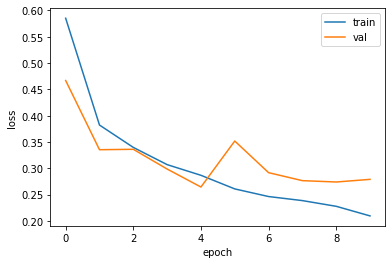

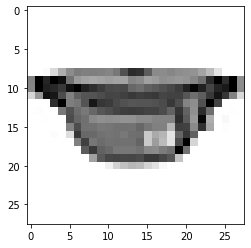

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

plt.imshow(train_input[0].reshape(28,28), cmap='gray_r')
plt.show()